In [37]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import librosa
import IPython.display
import librosa.display
import os
import random
from matplotlib.pyplot import specgram

In [38]:
random.seed(42)

In [39]:
style.use('ggplot')
%matplotlib inline

In [40]:
data_dir = '../data/esc-50'
sample_dir = os.path.join(data_dir, 'sample')
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [41]:
print 'Sound Sample Classes'
print '--------------------'
for d in os.listdir(sample_dir):
    print d

Sound Sample Classes
--------------------
rooster
coughing
insects
laughing


In [42]:
samples_dict = dict()
for d in os.listdir(sample_dir):
    sample_class_dir = os.path.join(sample_dir, d)
    samples_dict[d] = [os.path.join(sample_class_dir, f) for f in os.listdir(sample_class_dir)]
print samples_dict

{'insects': ['../data/esc-50/sample/insects/5-195518-A.ogg', '../data/esc-50/sample/insects/4-133895-A.ogg'], 'coughing': ['../data/esc-50/sample/coughing/5-178997-A.ogg', '../data/esc-50/sample/coughing/4-169726-A.ogg'], 'laughing': ['../data/esc-50/sample/laughing/3-118487-A.ogg', '../data/esc-50/sample/laughing/5-263775-B.ogg'], 'rooster': ['../data/esc-50/sample/rooster/2-81270-A.ogg', '../data/esc-50/sample/rooster/4-183487-A.ogg']}


In [43]:
def load_file(file_path, sr=44100):
    ts, sr = librosa.load(file_path, sr=sr)
    return ts

In [44]:
def get_raw_sounds(file_paths, sr=44100):
    return [load_file(fp, sr) for fp in file_paths]

In [45]:
def plot_waves(classes, raw_sounds):
    idx = 1
    fig = plt.figure(figsize=(12, 6))
    for name, f in zip(classes, raw_sounds):
        plt.subplot(len(classes), 1, idx)
        librosa.display.waveplot(np.array(f), sr=44100)
        plt.title(name.title())
        idx += 1
    plt.suptitle('Figure 1: Waveplot for Raw Audio', fontsize=10)
    plt.show()

In [46]:
def plot_spectrograms(classes,raw_sounds, sr=44100):
    idx = 1
    fig = plt.figure(figsize=(12, 6))
    for name, f in zip(classes,raw_sounds):
        plt.subplot(len(classes), 1, idx)
        specgram(np.array(f), Fs=22050)
        plt.title(name.title())
        idx += 1
    plt.suptitle('Figure 2: Spectrogram', fontsize=10)
    plt.show()

In [70]:
def plot_log_power_spectrograms(classes,raw_sounds):
    idx = 1
    fig = plt.figure(figsize=(12,6))
    for name, f in zip(classes,raw_sounds):
        plt.subplot(len(classes), 1, idx)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D, x_axis='time' , y_axis='log')
        plt.title(name.title())
        idx += 1
    plt.suptitle('Figure 3: Log power spectrogram', fontsize=10)
    plt.show()

In [60]:
sample_insect = random.choice(samples_dict.get('insects'))
IPython.display.Audio(sample_insect, embed=True, autoplay=True)

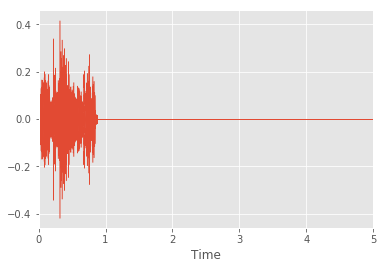

In [61]:
ts, sr = librosa.load(sample_insect)
librosa.display.waveplot(ts, sr=sr)

In [62]:
sample_rooster = random.choice(samples_dict.get('rooster'))
IPython.display.Audio(sample_rooster, embed=True, autoplay=True)

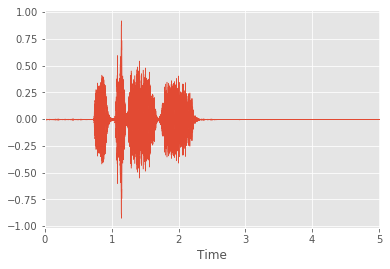

In [63]:
ts, sr = librosa.load(sample_rooster)
librosa.display.waveplot(ts, sr=sr)

In [64]:
sample_coughing = random.choice(samples_dict.get('coughing'))
IPython.display.Audio(sample_coughing, embed=True, autoplay=True)

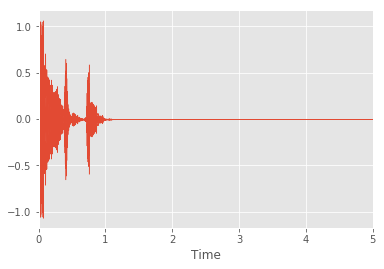

In [65]:
ts, sr = librosa.load(sample_coughing)
librosa.display.waveplot(ts, sr=sr)

In [66]:
sample_laughing = random.choice(samples_dict.get('laughing'))
IPython.display.Audio(sample_laughing, embed=True, autoplay=True)

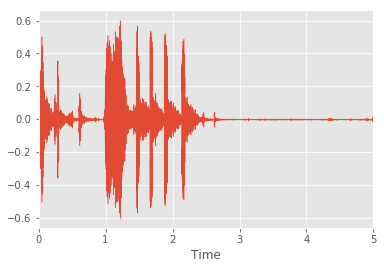

In [67]:
ts, sr = librosa.load(sample_laughing)
librosa.display.waveplot(ts, sr=sr)

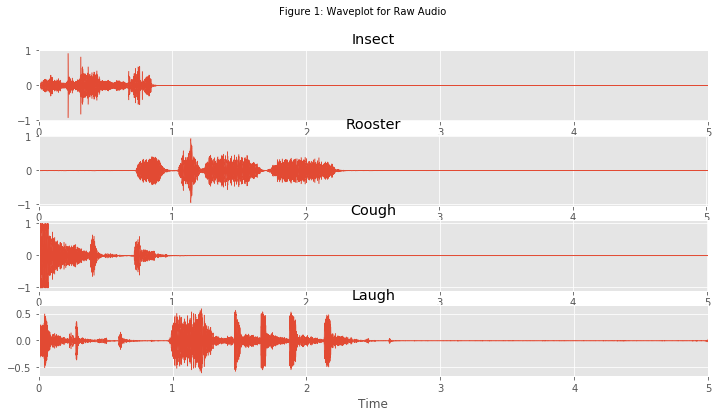

In [68]:
sound_signals = get_raw_sounds([sample_insect, sample_rooster, sample_coughing, sample_laughing])
sound_names = ['insect', 'rooster', 'cough', 'laugh'] 
plot_waves(sound_names, sound_signals)

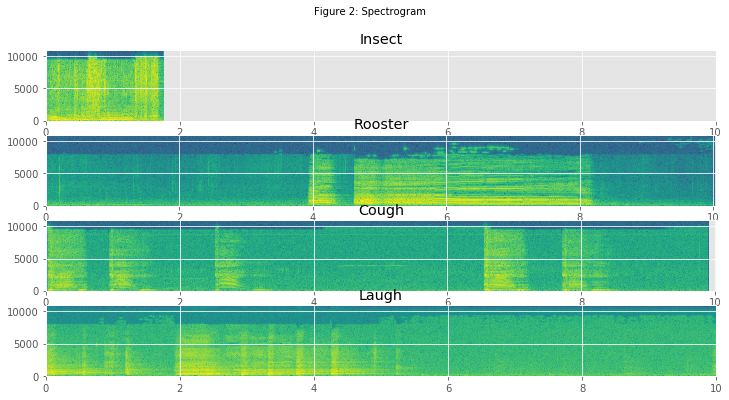

In [57]:
plot_spectrograms(sound_names, sound_signals)

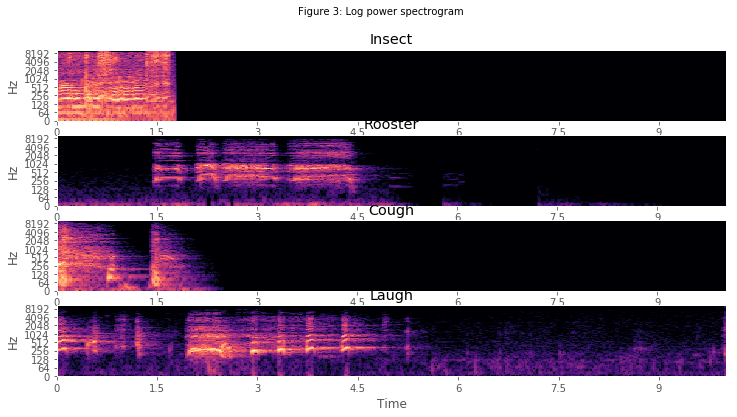

In [71]:
plot_log_power_spectrograms(sound_names, sound_signals)

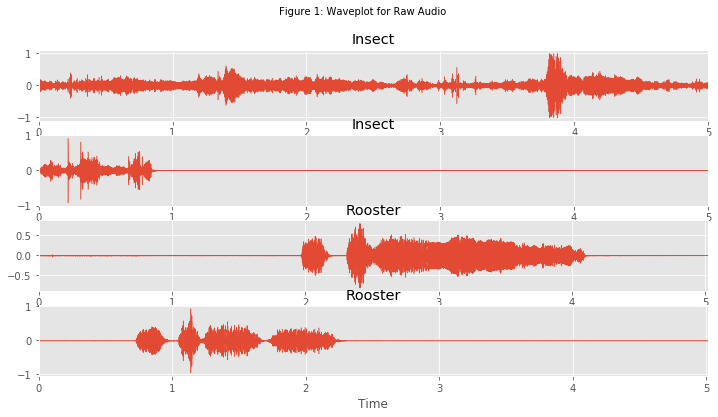

In [85]:
sound_signals = get_raw_sounds(samples_dict.get('insects') + samples_dict.get('rooster'))
sound_names = ['insect', 'insect', 'rooster', 'rooster'] 
plot_waves(sound_names, sound_signals)

In [58]:
ts, sr = librosa.load(sample_insect, sr=16000)
print 'Sampling Rate:', sr
print 'Number of Amplitude Samples:', len(ts)
print 'Duration of file:', len(ts) / sr, 'seconds'
print 'First 100 samples:\n', ts[:100]

Sampling Rate: 16000
Number of Amplitude Samples: 80040
Duration of file: 5 seconds
First 100 samples:
[-0.03389606 -0.05069605 -0.02642519 -0.01989887 -0.02596948  0.01117801
  0.0004405   0.00330494  0.03132441  0.00762418  0.00738513 -0.01282651
 -0.00427909 -0.00940616 -0.01118919 -0.01320426 -0.02522859 -0.03067319
 -0.04063303 -0.03360131 -0.04109933 -0.03656557 -0.03844074 -0.02741953
 -0.01792245 -0.02142989 -0.02103533 -0.02502997 -0.02765447 -0.04052966
 -0.03324717 -0.0351853  -0.03670156 -0.02239143 -0.02449604 -0.01865955
 -0.02572539 -0.00980799 -0.02303079 -0.03628864 -0.02324776 -0.04013262
 -0.02423249 -0.00429147 -0.0235154  -0.02737314 -0.01445006 -0.04174364
 -0.04122018 -0.01446364 -0.02852685 -0.03199136 -0.03358673 -0.02762741
 -0.02026068 -0.02775937 -0.00315095 -0.00404221  0.01012855  0.0219454
  0.02892357  0.03294317  0.02340405  0.03931184  0.03463749  0.01631285
  0.00081223  0.01103196  0.00528037  0.0062323  -0.00213845 -0.00446742
  0.00254441 -0.008820

In [132]:
frame_len = 20
num_frames = 5000 / frame_len
n = len(ts) / num_frames
insect_frames = [ts[i : i + n] for i in xrange(0, len(ts), n)]

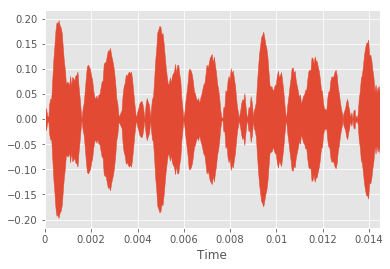

In [139]:
librosa.display.waveplot(insect_frames[0])

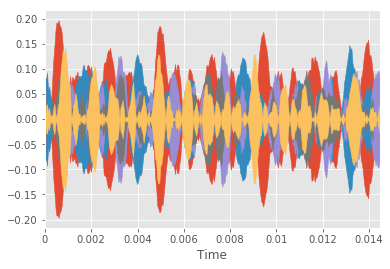

In [134]:
for i in range(5):
    librosa.display.waveplot(insect_frames[i])

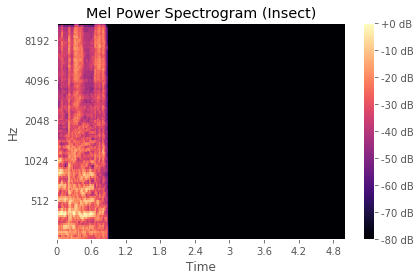

In [35]:
ts_insect, sr_insect = librosa.load(sample_insect, sr=41000)

# Create a Mel Spectrogram
spectrogram_insect = librosa.feature.melspectrogram(ts_insect, sr=sr_insect, n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_spectrogram_insect = librosa.logamplitude(spectrogram_insect, ref_power=np.max)
librosa.display.specshow(log_spectrogram_insect, sr=sr_insect, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel Power Spectrogram (Insect)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

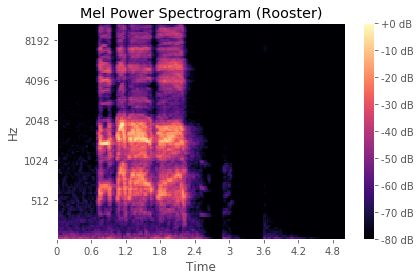

In [36]:
ts_rooster, sr_rooster = librosa.load(sample_rooster)
# Create a Mel Spectrogram
spectrogram_rooster = librosa.feature.melspectrogram(ts_rooster, sr=sr_rooster, n_mels=128)
# Convert to log scale (dB). We'll use the peak power as reference.
log_spectrogram_rooster = librosa.logamplitude(spectrogram_rooster, ref_power=np.max)
librosa.display.specshow(log_spectrogram_rooster, sr=sr_rooster, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Mel Power Spectrogram (Rooster)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

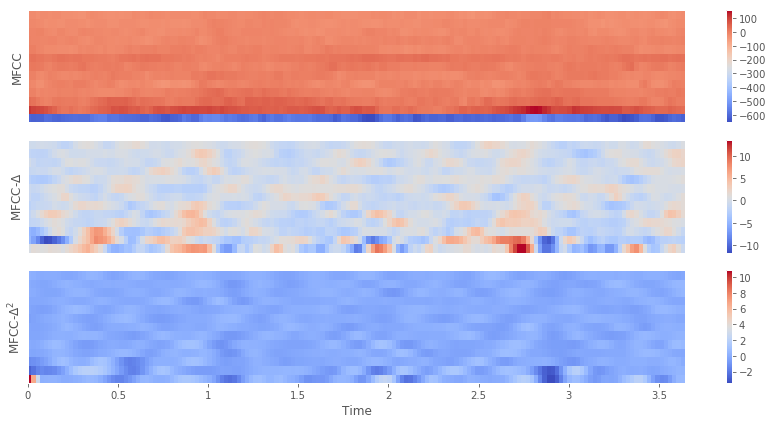

In [168]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(S=log_spectrogram_insect, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

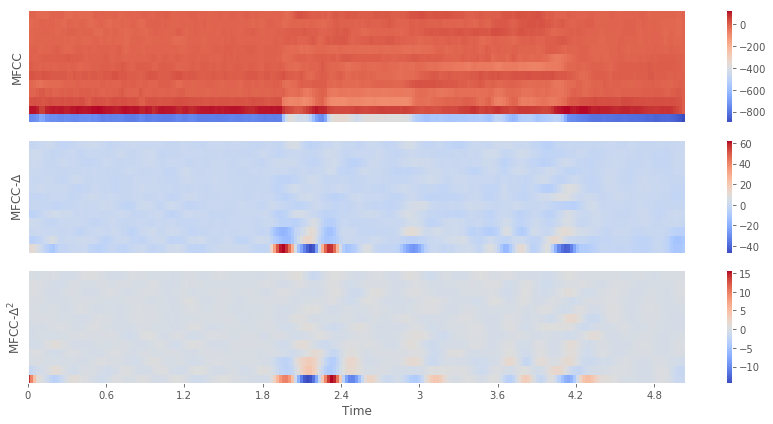

In [169]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(S=log_spectrogram_rooster, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()